In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
#Assign Data frames
metadata_df = pd.DataFrame(mouse_metadata, columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])
study_results_df= pd.DataFrame(study_results, columns=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"])

#Merge data frames using outer merge that way it returns only data that matches
merge_df = pd.merge(metadata_df, study_results_df, on="Mouse ID", how="inner")

#Replace any space in columns with "_" (this will be useful for using duplicate function)
merge_df.columns = merge_df.columns.str.replace(' ', '_')

# Display the data table for preview
merge_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
merge_df.shape # 1893 rows, 8 columns


(1893, 8)

In [3]:
#Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
# Find the duplicate ROWS for Mouse_ID and Timepoint in merge_df data frame+ assign variable
dup= merge_df.duplicated(subset=['Mouse_ID', 'Timepoint']) #5 duplicates
#Locate the duplicates
merge_df.loc[dup,"Mouse_ID"]



909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse_ID, dtype: object

In [4]:
#use conditional to locate all rows but g989 + assign variable
new_data= merge_df.loc[merge_df["Mouse_ID"]!= "g989" ]  


In [5]:
# Assign the new DataFrame (with the dropped Mouse_ID/Timepoint Data) a variable
pd.DataFrame(new_data)


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice= new_data["Mouse_ID"].nunique()
number_of_mice

248

In [7]:
#SUMMARY STATISTICS
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Groupby drug regimen
Drugs= new_data.groupby("Drug_Regimen")
Drugs.head()
Drugs.agg({"Tumor_Volume_(mm3)": "count"})
# Collect stats and set into a data frame
Mean= Drugs["Tumor_Volume_(mm3)"].mean()
Median= Drugs["Tumor_Volume_(mm3)"].median()
Variance= Drugs["Tumor_Volume_(mm3)"].var()
STD= Drugs["Tumor_Volume_(mm3)"].std()
SEM= Drugs["Tumor_Volume_(mm3)"].sem()
Summary_stats_table= pd.DataFrame({"Mean": Mean, "Median": Median,
"Variance":Variance,"STD":STD, "SEM": SEM     
                              })
Summary_stats_table
# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Mean,Median,Variance,STD,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#BAR AND PIE CHARTS
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_drugs= new_data["Drug_Regimen"].value_counts()

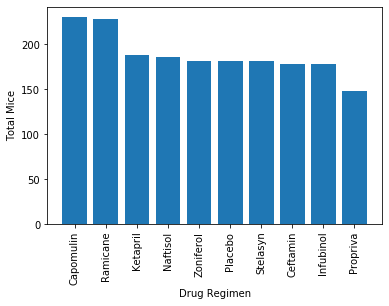

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(count_drugs.index.values, count_drugs.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')
plt.xticks(rotation=90)
plt.show()



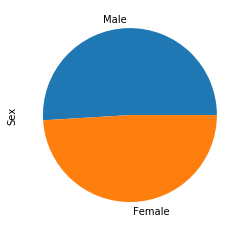

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Male_vs_Female= new_data["Sex"].value_counts()
Male_vs_Female
Male_vs_Female.plot(kind="pie")


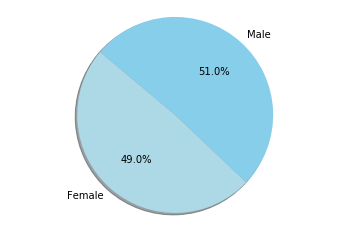

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Female", "Male"]
count = [922,958]
colors = ["lightblue","skyblue"]
plt.pie(count, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


In [12]:
#Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = new_data.groupby(['Mouse_ID'])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor_data = max_timepoint.merge(new_data,on=['Mouse_ID','Timepoint'],how="left")
merged_tumor_data



,Mouse_ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight_(g),Tumor_Volume_(mm3),Metastatic_Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
#Assign variables for each treatment with tumor volume according to last timepoint and
    # locate the rows which contain mice on each drug and get the tumor volumes

TV_Capomulin= merged_tumor_data.loc[merged_tumor_data['Drug_Regimen']== 'Capomulin']

Drug_Capomulin= TV_Capomulin.groupby(['Mouse_ID']) ['Tumor_Volume_(mm3)'].last()


TV_Ramicane= merged_tumor_data.loc[merged_tumor_data['Drug_Regimen']== 'Ramicane']
Drug_Ramicane= TV_Ramicane.groupby(['Mouse_ID']) ['Tumor_Volume_(mm3)'].last()


TV_Infubinol= merged_tumor_data.loc[merged_tumor_data['Drug_Regimen']== 'Infubinol']
Drug_Infubinol= TV_Infubinol.groupby(['Mouse_ID']) ['Tumor_Volume_(mm3)'].last()


TV_Ceftamin= merged_tumor_data.loc[merged_tumor_data['Drug_Regimen']== 'Ceftamin']
Drug_Ceftamin= TV_Ceftamin.groupby(['Mouse_ID']) ['Tumor_Volume_(mm3)'].last()
#Create the list

Treatments= [Drug_Capomulin,Drug_Ramicane,Drug_Infubinol,Drug_Ceftamin ]


# Create empty list to fill with tumor vol data (for plotting)
Tumor_Volume=[]





In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers: 
#FOR CAPOMULIN
quartiles_cap = Drug_Capomulin.quantile([0.25,0.5,0.75])
lowerq = quartiles_cap[0.25]
upperq = quartiles_cap[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor volume after using Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume after using Capomulin is: {upperq}")
print(f"The interquartile of tumor volume after using Capomulin is: {iqr}")
print(f"The the median of of tumor volume after using Capomulin is: {quartiles_cap[0.5]} ")
 
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



#FOR RAMICANE
quartiles_ram = Drug_Ramicane.quantile([0.25,0.5,0.75])
lowerq_R = quartiles_ram[0.25]
upperq_R = quartiles_ram[0.75]
iqr_R = upperq_R-lowerq_R
print(f"The lower quartile of tumor volume after using Ramicane is: {lowerq_R}")
print(f"The upper quartile of tumor volume after using Ramicane is: {upperq_R}")
print(f"The interquartile of tumor volume after using Ramicane is: {iqr_R}")
print(f"The the median of of tumor volume after using Ramicane is: {quartiles_ram[0.5]} ")
 
# Determine outliers using upper and lower bounds
lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)
print(f"Values below {lower_bound_R} could be outliers.")
print(f"Values above {upper_bound_R} could be outliers.")


#FOR INFUBINOL
quartiles_inf = Drug_Infubinol.quantile([0.25,0.5,0.75])
lowerq_I = quartiles_inf[0.25]
upperq_I = quartiles_inf[0.75]
iqr_I = upperq_I-lowerq_I
print(f"The lower quartile of tumor volume after using Infubinol is: {lowerq_I}")
print(f"The upper quartile of tumor volume after using Infubinol is: {upperq_I}")
print(f"The interquartile of tumor volume after using Infubinol is: {iqr_I}")
print(f"The the median of of tumor volume after using Infubinol is: {quartiles_inf[0.5]} ")
 
# Determine outliers using upper and lower bounds
lower_bound_I = lowerq_I - (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)
print(f"Values below {lower_bound_I} could be outliers.")
print(f"Values above {upper_bound_I} could be outliers.")



#FOR CEFTAMIN
quartiles_cef = Drug_Ceftamin.quantile([0.25,0.5,0.75])
lowerq_C = quartiles_cef[0.25]
upperq_C = quartiles_cef[0.75]
iqr_C = upperq_C-lowerq_C
print(f"The lower quartile of tumor volume after using Ceftamin is: {lowerq_C}")
print(f"The upper quartile of tumor volume after using Ceftamin is: {upperq_C}")
print(f"The interquartile of tumor volume after using Ceftamin is: {iqr_C}")
print(f"The the median of of tumor volume after using Ceftamin is: {quartiles_cef[0.5]} ")
 
# Determine outliers using upper and lower bounds
lower_bound_C = lowerq_C - (1.5*iqr_C)
upper_bound_C = upperq_C + (1.5*iqr_C)
print(f"Values below {lower_bound_C} could be outliers.")
print(f"Values above {upper_bound_C} could be outliers.")

    

The lower quartile of tumor volume after using Capomulin is: 32.37735684
The upper quartile of tumor volume after using Capomulin is: 40.1592203
The interquartile of tumor volume after using Capomulin is: 7.781863460000004
The the median of of tumor volume after using Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of tumor volume after using Ramicane is: 31.56046955
The upper quartile of tumor volume after using Ramicane is: 40.65900627
The interquartile of tumor volume after using Ramicane is: 9.098536719999998
The the median of of tumor volume after using Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of tumor volume after using Infubinol is: 54.04860769
The upper quartile of tumor volume after using Infubinol is: 65.52574285
The interquartile of tumor volume after using Infubinol is: 11.477135

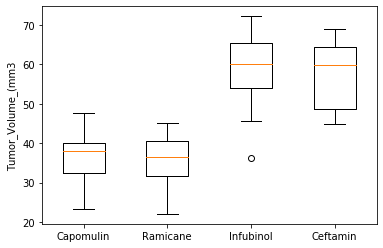

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax= plt.subplots()
ax.boxplot(Drug_Capomulin, positions= [1], widths= 0.5)
ax.boxplot(Drug_Ramicane, positions= [2], widths= 0.5)
ax.boxplot(Drug_Infubinol, positions= [3], widths= 0.5)
ax.boxplot(Drug_Ceftamin, positions= [4], widths= 0.5)
ax.set_xticklabels(['Capomulin', 'Ramicane' ,'Infubinol' ,'Ceftamin'])
ax.set_ylabel('Tumor_Volume_(mm3')

plt.show()


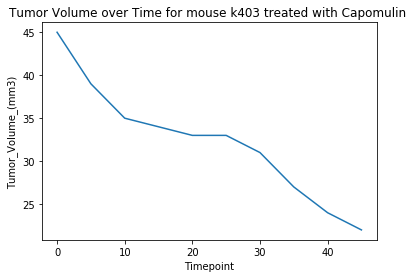

In [16]:
#LINE AND SCATTER PLOTS
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#use :
#TV_Capomulin= merged_tumor_data.loc[merged_tumor_data['Drug_Regimen']== 'Capomulin']
#Drug_Capomulin= TV_Capomulin.groupby(['Mouse_ID']=='k403' ) 

import numpy as np
time= np.arange(0 ,101, 10)
y_axis=[45,39,35,34,33,33,31,27,24,22]

x_axis= [0,5,10,15,20,25,30,35,40,45]
plt.plot(x_axis, y_axis)
plt.ylabel("Tumor_Volume_(mm3)")
plt.xlabel("Timepoint")
plt.title("Tumor Volume over Time for mouse k403 treated with Capomulin ")
plt.show()


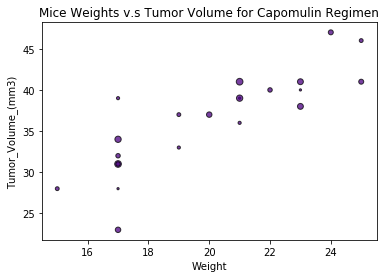

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Use TV_Capomulin to find exact points
Weight= [22,21,17,19,22,24,20,23,21,21,19,17,19,25,17,25,17,23,17,17,21,23,21,15,17]
Tumor_V=[39,39,39,37,40,47,37,38,39,41,39,28,33,46,32,41,23,41,34,31,41,40,36,28,31]
plt.scatter(Weight, Tumor_V, marker="o", facecolors="indigo", edgecolors="black", s=x_axis, alpha=0.75)
plt.ylabel("Tumor_Volume_(mm3)")
plt.xlabel("Weight")
plt.title("Mice Weights v.s Tumor Volume for Capomulin Regimen")
plt.show()

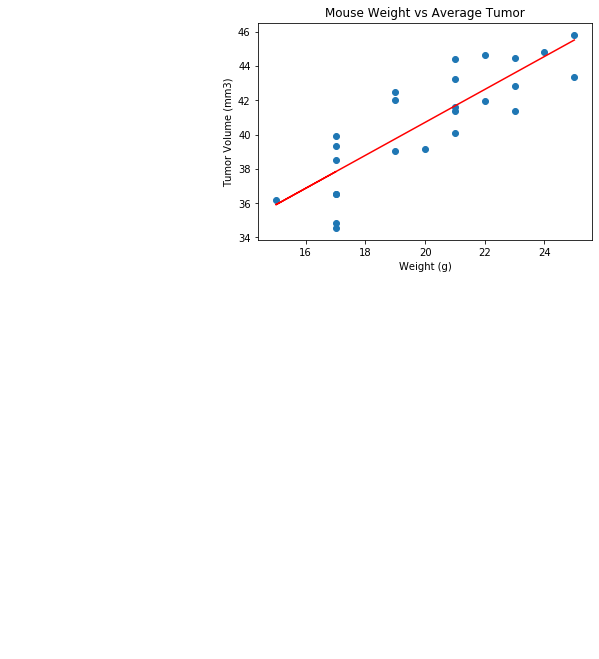

In [19]:
#Correlation and Regression
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
scatter_cap = new_data.loc[new_data["Drug_Regimen"]== "Capomulin"]

Mouse_weight= scatter_cap.groupby(['Mouse_ID']) ['Weight_(g)'].mean()
Average_tumor_v= scatter_cap.groupby(['Mouse_ID'])['Tumor_Volume_(mm3)'].mean()
x_values = scatter_cap['Weight_(g)']
y_values = scatter_cap['Tumor_Volume_(mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)#stack overflow and homework
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(Mouse_weight, Average_tumor_v, marker = "o")
plt.show()


In [ ]:
#3 observations about the data:
#1. The most mice were used for Capomulin and for Ramicane Treatment
#2. Tumor volume shows to decrease over time for the Capomulin treatment.
#3.The linear regreassion model shows a positive coorelation between Mouse weight and Tumor volume.